# Notebook for stencil validation and timing

Jan, Nina Horat & Laura

In [90]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

## Validation
### Create testfields
We create one testfield per stencil_name (option --create_field = True). After creation the fields are saved in the folder testfields and can be accessed by the option --field_name.

In [91]:
stencil_name_list = [
        "test",
        "laplacian1d", 
        "laplacian2d",
        "laplacian3d",
        "FMA",
       "lapoflap1d",
        "lapoflap2d",
        "lapoflap3d",
        "test_gt4py",
    ]

backend_list = ["numpy", 
                "numba_vector_function", 
                "numba_vector_decorator", 
                "numba_loop", 
                "numba_stencil", 
                "gt4py"]


In [3]:
#if somebody knows how to remove the b and \n 
for x in stencil_name_list:
    
    bashCommand=f"python3 stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend numpy --create_field True --field_name {x}"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    output, error = process.communicate()
    
    print(output.decode("utf-8"))# <class 'str'>

New output field test saved.

New output field laplacian1d saved.

New output field laplacian2d saved.

New output field laplacian3d saved.

New output field FMA saved.

New output field lapoflap1d saved.

New output field lapoflap2d saved.

New output field lapoflap3d saved.




In [14]:
for x in stencil_name_list:
    print(x,':')
    for y in backend_list:
        bashCommand=f"python3 stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend {y} --create_field False --field_name {x}"
        process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()
        print(output.decode("utf-8"))

lapoflap1d :
Field validation for stencil lapoflap1d in backend numba_loop is: True.

Field validation for stencil lapoflap1d in backend numba_stencil is: True.


lapoflap2d :
Field validation for stencil lapoflap2d in backend numba_loop is: True.

Field validation for stencil lapoflap2d in backend numba_stencil is: True.

Field validation for stencil lapoflap2d in backend gt4py is: False.

lapoflap3d :
Field validation for stencil lapoflap3d in backend numba_loop is: True.

Field validation for stencil lapoflap3d in backend numba_stencil is: True.

Field validation for stencil lapoflap3d in backend gt4py is: False.

test_gt4py :





## Timing
### Execute Stencil computation for evaluation
In this section the different stencils for the different domain sizes are calculated.


In [92]:
field_size_list = [16,32,64]

In [34]:
#this takes some time...
for size in field_size_list:
    print(size,':')
    for x in stencil_name_list:
        print('    ',x,':')
        for y in backend_list:
            bashCommand=f"python3 stencil_main_performance.py --nx {size} --ny {size} --nz {size} --stencil_name {x} --backend {y} --num_iter 20 --df_name val_2"
            process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
            output, error = process.communicate()
            #print(output.decode("utf-8"))

test :
laplacian1d :
laplacian2d :
laplacian3d :
FMA :
lapoflap1d :
lapoflap2d :
lapoflap3d :
test_gt4py :
test :
laplacian1d :
laplacian2d :
laplacian3d :
FMA :
lapoflap1d :
lapoflap2d :
lapoflap3d :
test_gt4py :
test :
laplacian1d :
laplacian2d :
laplacian3d :
FMA :
lapoflap1d :
lapoflap2d :
lapoflap3d :
test_gt4py :


In [22]:
#Test Stencil 32 x 32 x 32
#!python3 stencil_main.py --nx 32 --ny 32 --nz 32 --num_iter 50 --stencil_name test --backend numpy --df_name test --field_name test32 --create_field False --save_runtime True 


### Read out the dataframe and plot results
The program saves the evaluation data into a pandas dataframe (Name is defined with the option --df_name). Subsequently the df can be accessed for further processing within a jupyter notebook.

In [19]:
df_name = "test" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

,stencil_name,backend,nx,ny,nz,valid,field_name,num_iter,time_total,run_avg,run_stdev,run_first10,run_last10
0,test,numpy,32,32,32,True,test32,50,0.001084,0.000022,0.000024,0.000034,0.000017
1,test,numpy,32,32,32,True,test32,50,0.001171,0.000023,0.000028,0.000039,0.000020
2,test,numbajit,32,32,32,True,test32,50,0.000979,0.000020,0.000026,0.000036,0.000016
3,test,numbajit,32,32,32,True,test32,50,0.000950,0.000019,0.000022,0.000032,0.000016
4,test,numbajit,32,32,32,True,test32,50,0.001268,0.000025,0.000043,0.000052,0.000018
5,test,numbajit,32,32,32,True,test32,50,0.000957,0.000019,0.000024,0.000033,0.000016
6,test,numpy,32,32,32,True,test32,50,0.001186,0.000024,0.000029,0.000040,0.000020


In [20]:
df_name = "planb" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

,stencil_name,backend,nx,ny,nz,valid,field_name,num_iter,time_total,run_avg,run_stdev,run_first10,run_last10,gt4py_backend,numba_parallel
40,laplacian2d,numba_vector_function,32,32,32,True,test,5,0.001786,0.000357,0.000012,NaN,NaN,NaN,NaN
41,laplacian2d,numba_vector_function,32,32,32,True,test,5,0.002249,0.000450,0.000068,NaN,NaN,NaN,NaN
42,laplacian2d,numba_vector_function,32,32,32,True,test,5,0.002268,0.000454,0.000060,NaN,NaN,numpy,1.0
43,laplacian2d,numba_vector_function,32,32,32,True,test,5,0.002308,0.000462,0.000040,NaN,NaN,numpy,1.0
44,laplacian2d,numba_vector_function,32,32,32,True,test,5,0.002009,0.000402,0.000038,NaN,NaN,numpy,1.0
45,laplacian3d,numba_vector_function,32,32,32,False,test,5,0.003411,0.000682,0.000027,NaN,NaN,numpy,1.0
46,laplacian2d,numba_vector_decorator,32,32,32,True,test,5,0.002052,0.000410,0.000039,NaN,NaN,numpy,1.0
47,laplacian2d,numba_loop,32,32,32,True,test,5,0.584002,0.116800,0.012937,NaN,NaN,numpy,1.0
48,laplacian2d,numpy,32,32,32,True,test,5,0.001081,0.000216,0.000018,NaN,NaN,numpy,1.0
49,laplacian2d,numpy,32,32,32,True,test,5,0.001058,0.000212,0.000010,NaN,NaN,numpy,1.0


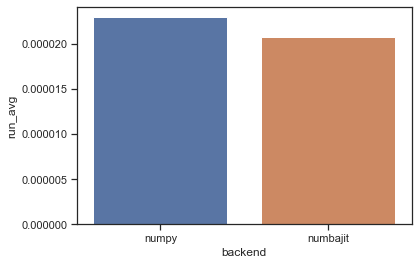

In [90]:
sns.set(style="ticks")

ax = sns.barplot('backend','run_avg',data=df, ci=None)

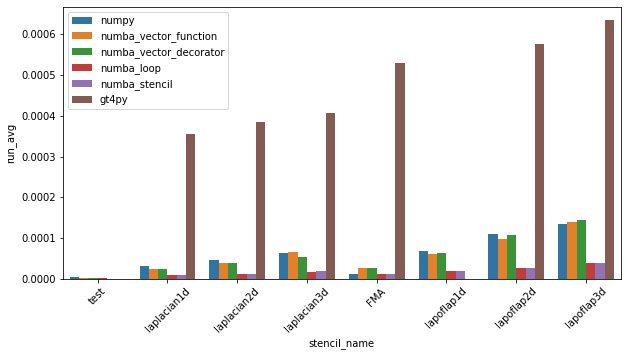

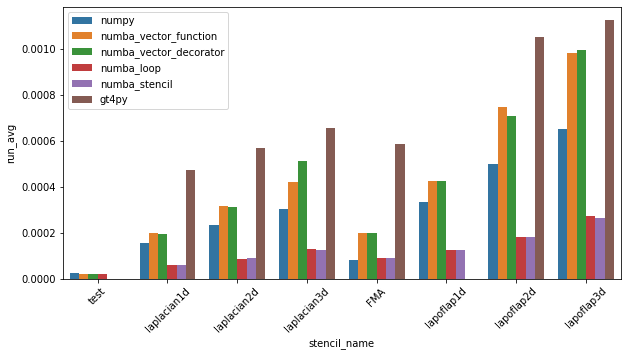

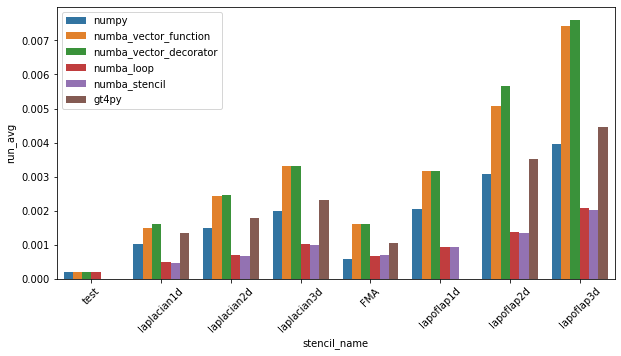

In [42]:

df_name = "val_1" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

df16=df.loc[df["nx"]==16]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df16, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')


df32=df.loc[df["nx"]==32]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df32, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

df64=df.loc[df["nx"]==64]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df64, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

(48, 5)


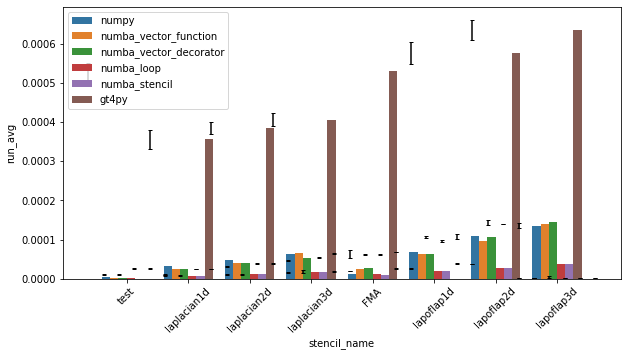

In [89]:
#############first try to add error bars. 
#the location of the bars is still wrong since the rows get ordered differently when .groupby is applied. 
#also I had to add data points for gt4py and numba_stencil where the function do not yet work.
#but this would be an option to get the error bars on top of everything.
#https://stackoverflow.com/questions/62820959/use-precalculated-error-bars-with-seaborn-and-barplot
#https://matplotlib.org/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

df_name = "val_1" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

df16=df.loc[df["nx"]==16]
plt.figure(figsize=(10,5))
chart =sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df16, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

conc2=[0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7]
width = .25
add = [-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width, -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
       -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
       -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
       -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
      ]
x = np.array(conc2)+np.array(add)
#print(x)

df16_stdev=df16.groupby(['stencil_name','backend']).mean()
df16_stdev=df16_stdev.append(df16_stdev[-4:-1])
#print(df16_stdev)
print(df16_stdev.shape)
plt.errorbar(x = x, y = df16_stdev['run_avg'],
            yerr = df16_stdev['run_stdev'],
             fmt='none', c= 'black', capsize = 2
            )
plt.show()


In [47]:
#Clear df on disk
df_name = "test"
os.remove("eval/{}_result.pkl".format(df_name))

### Evaluate Runtime
We suspect that different number of iterations will lead to different runtime developments.
This can be tested with the option --save_runtime. The df runtimedevelopment can afterwards be evaluated.

In [64]:
df_runtime = pd.read_pickle("eval/runtimedevelopment.pkl")
df_runtime.columns = ['runtime']
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


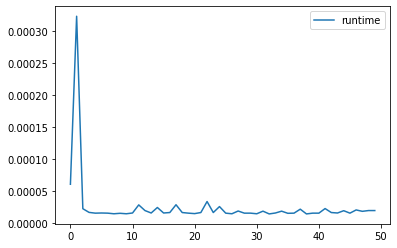

In [65]:
df_runtime.plot()